In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
v5_txt = '/Users/andreaberti/Documents/work/DBT/test_inference/on_test/detections_v5_on_test.txt'
df_v5 = pd.read_csv(v5_txt, sep=' ')

v8_txt = '/Users/andreaberti/Documents/work/DBT/test_inference/on_test/detections_v8_on_test.txt'
df_v8 = pd.read_csv(v8_txt, sep=' ')

ens_txt = '/Users/andreaberti/Documents/work/DBT/test_inference/on_test/on_test_precision.txt'
df_ens = pd.read_csv(ens_txt, sep=' ')

sum_txt = '/Users/andreaberti/Documents/work/DBT/test_inference/on_test/on_test.txt'
df_sum = pd.read_csv(sum_txt, sep=' ')

mean_txt = '/Users/andreaberti/Documents/work/DBT/test_inference/on_test/on_test_mean.txt'
df_mean = pd.read_csv(mean_txt, sep=' ')

In [3]:
conf_th = np.array([0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65])

In [4]:
df_v5

,conf_th,nr_TP,nr_FP,nr_FN
0,0.05,34.0,71.0,16.0
1,0.10,34.0,71.0,16.0
2,0.15,29.0,55.0,21.0
3,0.20,25.0,45.0,25.0
4,0.25,24.0,36.0,26.0
5,0.30,21.0,29.0,29.0
6,0.35,17.0,21.0,33.0
7,0.40,16.0,15.0,34.0
8,0.45,12.0,8.0,38.0
9,0.50,11.0,5.0,39.0


In [5]:
v5_prec = df_v5.loc[:, 'nr_TP'] / (df_v5.loc[:, 'nr_TP'] + df_v5.loc[:, 'nr_FP'] + 1)
v8_prec = df_v8.loc[:, 'nr_TP'] / (df_v8.loc[:, 'nr_TP'] + df_v8.loc[:, 'nr_FP'] + 1)
ens_prec = df_ens.loc[:, 'nr_TP'] / (df_ens.loc[:, 'nr_TP'] + df_ens.loc[:, 'nr_FP'] + 1)
sum_prec = df_sum.loc[:, 'nr_TP'] / (df_sum.loc[:, 'nr_TP'] + df_sum.loc[:, 'nr_FP'] + 1)
mean_prec = df_mean.loc[:, 'nr_TP'] / (df_mean.loc[:, 'nr_TP'] + df_mean.loc[:, 'nr_FP'] + 1)

v5_recall = df_v5.loc[:, 'nr_TP'] / (df_v5.loc[:, 'nr_TP'] + df_v5.loc[:, 'nr_FN'])
v8_recall = df_v8.loc[:, 'nr_TP'] / (df_v8.loc[:, 'nr_TP'] + df_v8.loc[:, 'nr_FN'])
ens_recall = df_ens.loc[:, 'nr_TP'] / (df_ens.loc[:, 'nr_TP'] + df_ens.loc[:, 'nr_FN'])
sum_recall = df_sum.loc[:, 'nr_TP'] / (df_sum.loc[:, 'nr_TP'] + df_sum.loc[:, 'nr_FN'])
mean_recall = df_mean.loc[:, 'nr_TP'] / (df_mean.loc[:, 'nr_TP'] + df_mean.loc[:, 'nr_FN'])

Text(0.5, 0.98, 'On Test set')

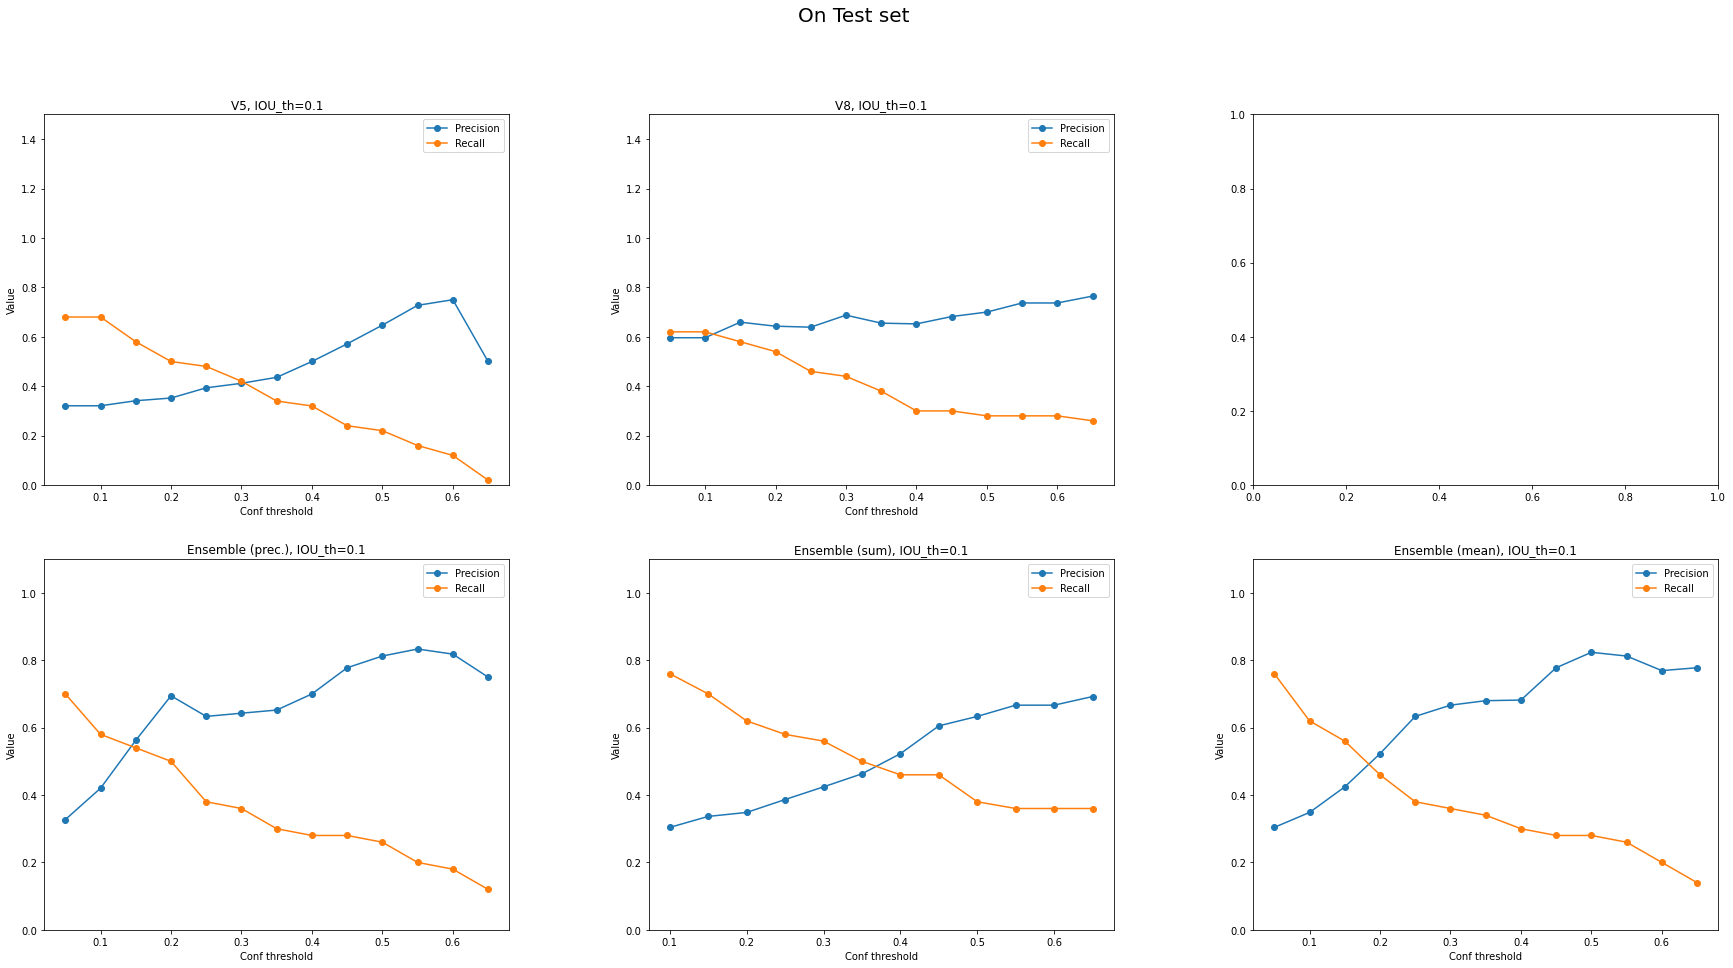

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))
ax1, ax2, ax3, ax4, ax5= ax[0, 0], ax[0, 1], ax[1, 0], ax[1, 1], ax[1, 2]

# First plot
ax1.set_xlabel('Conf threshold')
ax1.set_ylabel('Value')
ax1.plot(df_v5.loc[:, 'conf_th'], v5_prec, '-o', label='Precision')
ax1.plot(df_v5.loc[:, 'conf_th'], v5_recall, '-o', label='Recall')

ax1.legend(loc='upper right')
ax1.set_title('V5, IOU_th=0.1')
ax1.set_ylim((0, 1.5))

# Second plot
ax2.set_xlabel('Conf threshold')
ax2.set_ylabel('Value')
ax2.plot(df_v8.loc[:, 'conf_th'], v8_prec, '-o', label='Precision')
ax2.plot(df_v8.loc[:, 'conf_th'], v8_recall, '-o', label='Recall')

ax2.legend(loc='upper right')
ax2.set_title('V8, IOU_th=0.1')
ax2.set_ylim((0, 1.5))

# Third plot
ax3.set_xlabel('Conf threshold')
ax3.set_ylabel('Value')
ax3.plot(df_ens.loc[:, 'conf_th'], ens_prec, '-o', label='Precision')
ax3.plot(df_ens.loc[:, 'conf_th'], ens_recall, '-o', label='Recall')

ax3.legend(loc='upper right')
ax3.set_title('Ensemble (prec.), IOU_th=0.1')
ax3.set_ylim((0, 1.1))

# Fourth plot
ax4.set_xlabel('Conf threshold')
ax4.set_ylabel('Value')
ax4.plot(conf_th, sum_prec, '-o', label='Precision')
ax4.plot(conf_th, sum_recall, '-o', label='Recall')

ax4.legend(loc='upper right')
ax4.set_title('Ensemble (sum), IOU_th=0.1')
ax4.set_ylim((0, 1.1))

# Fifth plot
ax5.set_xlabel('Conf threshold')
ax5.set_ylabel('Value')
ax5.plot(df_mean.loc[:, 'conf_th'], mean_prec, '-o', label='Precision')
ax5.plot(df_mean.loc[:, 'conf_th'], mean_recall, '-o', label='Recall')

ax5.legend(loc='upper right')
ax5.set_title('Ensemble (mean), IOU_th=0.1')
ax5.set_ylim((0, 1.1))


# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.3)

fig.suptitle('On Test set', fontsize=20)


In [30]:
df_ens

,conf_th,nr_TP,nr_FP,nr_FN
0,0.05,25.0,60.0,8.0
1,0.10,20.0,30.0,13.0
2,0.15,18.0,15.0,15.0
3,0.20,16.0,13.0,17.0
4,0.25,14.0,9.0,19.0
5,0.30,14.0,8.0,19.0
6,0.35,13.0,5.0,20.0
7,0.40,9.0,2.0,24.0
8,0.45,8.0,2.0,25.0
9,0.50,5.0,0.0,28.0
